In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [409]:
california_houses = datasets.fetch_california_housing()
df_calif_houses = pd.DataFrame(california_houses['data']).rename(columns={0: 'MedInc', 1: 'HouseAge', 2: 'AveRooms', 3: 'AveBedrms',
                                                        4: 'Population', 5: 'AveOccup', 6: 'Latitude', 7: 'Longitude'})
df_calif_houses['MedHouseVal'] = california_houses['target']
df_calif_houses.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df_calif_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
print(california_houses.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [374]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Normalizer

In [375]:
X = df_calif_houses[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df_calif_houses['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [376]:
model.score(X_test, y_test)

0.575787706032451

In [377]:
y_pred = model.predict(X_test)

In [378]:
mean_squared_error(y_test, y_pred, squared=False)

0.7455813830127762

In [379]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

In [396]:
X = df_calif_houses[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df_calif_houses['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(random_state=1234)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1234)

In [397]:
model.score(X_test, y_test)

0.6167402039102818

In [398]:
y_pred = model.predict(X_test)

In [399]:
mean_squared_error(y_test, y_pred, squared=False)

0.7086798133111618

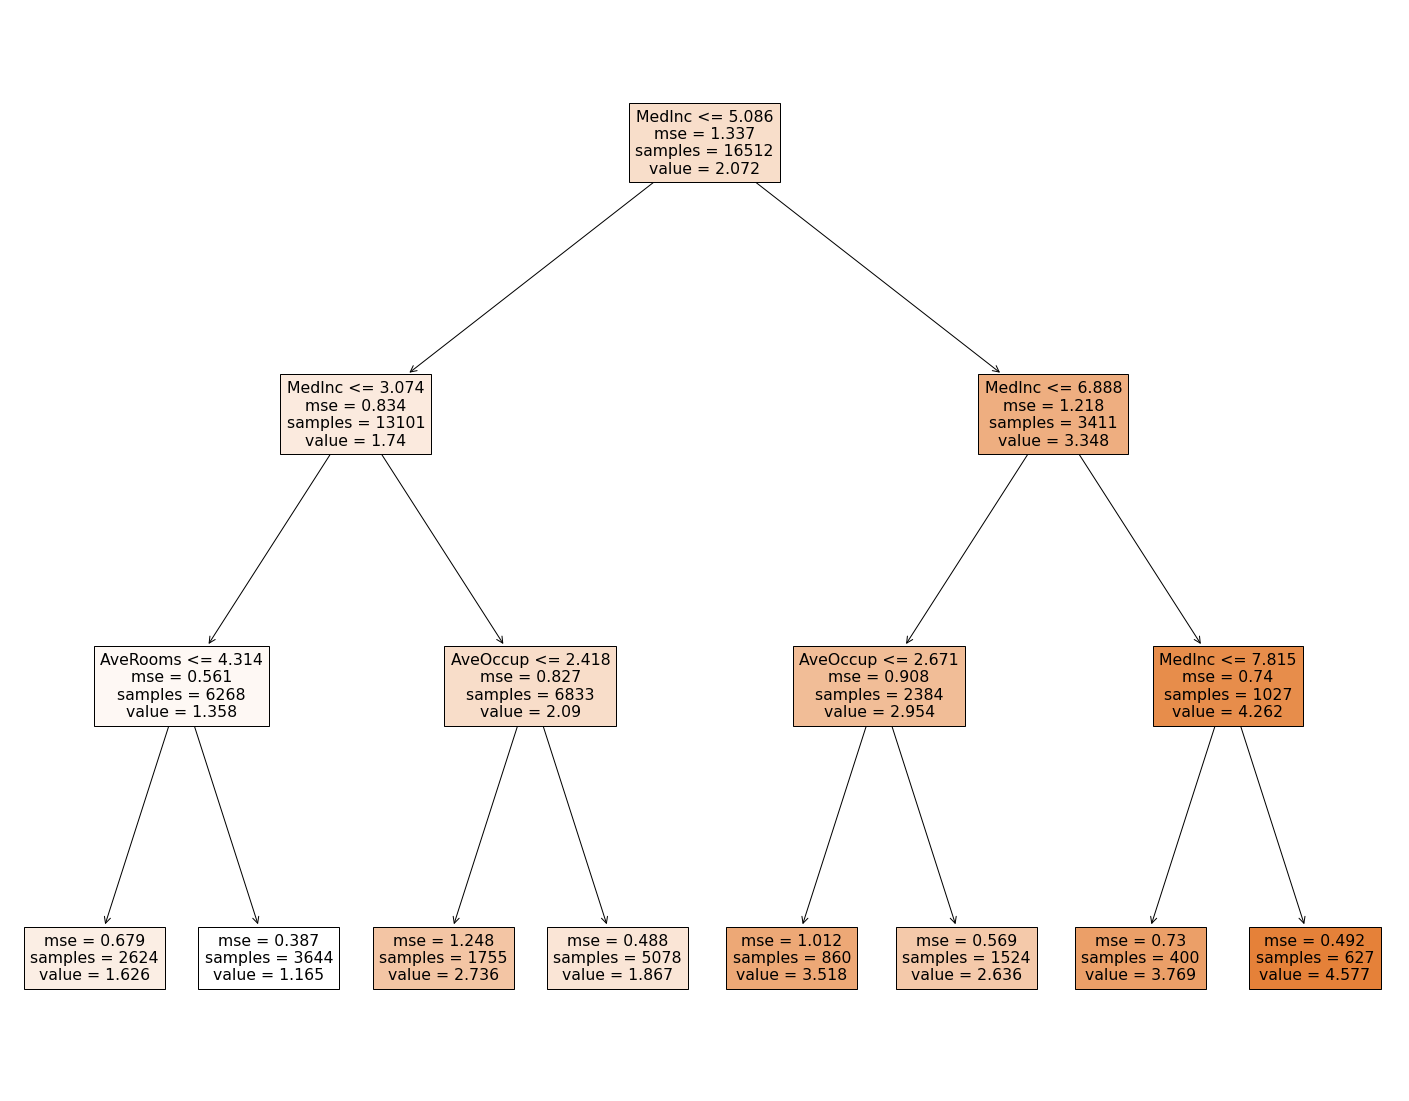

In [389]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=df_calif_houses.columns, filled=True)

Схема для дерева глубиной 3. При неограниченном числе ветвей, модель работала, но график не вырисовывался. В то же время первые уровни совпадают у обеих моделей.

In [410]:
X = df_calif_houses[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df_calif_houses['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(max_depth=12, min_samples_leaf=9, random_state=1234)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=9, random_state=1234)

In [411]:
model.score(X_test, y_test)

0.7238532692470385

In [412]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

0.6015522880768995

По метрикам дерево решений показывает себя ощутимо лучше чем линейная регрессия. Если сравнивать с с регрессией из моего предыдущего дз, то она имеет лушчшие показатели. Однако она по факту является уже полиномиальной ргерссией со степенью 3, и данные для обучения прошли серьёзную предварительную обработку. В случае с деревом решений, ничего подобного делать не пришлось, и при подборе нужных параметров удалось достичь хорошего коэфицента детерминации, что говорит о нахаждении зависимсти между признаками и целевой переменной. Несколько хромает RMSE, но все равно лучше чем у простой линейной модели. Датасет явно имеет нелинейное расспределение в данных, поэтому здесь обычная линейная регрессия не очень подходит. Древо решений дает понятную систему правил, но остаются вопросы по поводу устойчивости модели к выбросам. Если конфигурация домохозяйств в Калифорнии будет оставться примерно таким же, древовидная модель вполне подйдёт.